In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.compose import make_column_selector as selector
import seaborn as sb

In [64]:
df = pd.read_csv("salaries.csv")

### Análise exploratória do dataset

In [3]:
#len(df)
df.shape

(16534, 11)

In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.dtypes

work_year              int64
experience_level      string
employment_type       string
job_title             string
salary                 int64
salary_currency       string
salary_in_usd          int64
employee_residence    string
remote_ratio           int64
company_location      string
company_size          string
dtype: object

Tranformar colunas do tipo object para string

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [63]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [23]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.describe(include = "int64")

,work_year,salary,salary_in_usd,remote_ratio
count,16534.0,16534.0,16534.0,16534.0
mean,2023.2,163727.0,149686.8,32.0
std,0.7,340205.7,68505.3,46.2
min,2020.0,14000.0,15000.0,0.0
25%,2023.0,101763.0,101125.0,0.0
50%,2023.0,142200.0,141300.0,0.0
75%,2024.0,187200.0,185900.0,100.0
max,2024.0,30400000.0,800000.0,100.0


#### Valores unicos das colunas, exceto as de salário e remote_radio

In [6]:
df[["company_location"]].value_counts(normalize=True).head(20).reset_index(name="Proporção").merge(df[["company_location"]].value_counts().reset_index(name="Contagem"))

,company_location,Proporção,Contagem
0,US,0.878069,14518
1,GB,0.041974,694
2,CA,0.027519,455
3,ES,0.008044,133
4,DE,0.006351,105
5,FR,0.003931,65
6,IN,0.003810,63
7,AU,0.003447,57
8,NL,0.001935,32
9,PT,0.001693,28


In [7]:
df[["employee_residence"]].value_counts(normalize=True).head(20).reset_index(name="Proporção").merge(df[["employee_residence"]].value_counts().reset_index(name="Contagem"))

,employee_residence,Proporção,Contagem
0,US,0.874985,14467
1,GB,0.041490,686
2,CA,0.027398,453
3,ES,0.008286,137
4,DE,0.005927,98
5,IN,0.004718,78
6,FR,0.004173,69
7,AU,0.003266,54
8,NL,0.001935,32
9,PT,0.001814,30


In [8]:
df[["salary_currency"]].value_counts(normalize=True).head(20).reset_index(name="Proporção").merge(df[["salary_currency"]].value_counts().reset_index(name="Contagem"))

,salary_currency,Proporção,Contagem
0,USD,0.925003,15294
1,GBP,0.037257,616
2,EUR,0.027156,449
3,CAD,0.003387,56
4,INR,0.003326,55
5,AUD,0.000726,12
6,CHF,0.000484,8
7,PLN,0.000423,7
8,SGD,0.000363,6
9,BRL,0.000302,5


In [5]:
df[["work_year"]].value_counts(normalize=True).head(20).reset_index(name="Proporção").merge(df[["work_year"]].value_counts().head(20).reset_index(name="Contagem"))

,work_year,Proporção,Contagem
0,2023,0.515241,8519
1,2024,0.366941,6067
2,2022,0.100097,1655
3,2021,0.013185,218
4,2020,0.004536,75


In [9]:
df[["employment_type"]].value_counts(normalize=True).head(20).reset_index(name="Proporção").merge(df[["employment_type"]].value_counts().head(20).reset_index(name="Contagem"))

,employment_type,Proporção,Contagem
0,FT,0.995161,16454
1,PT,0.002298,38
2,CT,0.001693,28
3,FL,0.000847,14


In [10]:
df[["experience_level"]].value_counts(normalize=True).head(20).reset_index(name="Proporção").merge(df[["experience_level"]].value_counts().head(20).reset_index(name="Contagem"))

,experience_level,Proporção,Contagem
0,SE,0.645337,10670
1,MI,0.244224,4038
2,EN,0.080138,1325
3,EX,0.030301,501


In [11]:
df[["company_size"]].value_counts(normalize=True).head(20).reset_index(name="Proporção").merge(df[["company_size"]].value_counts().head(20).reset_index(name="Contagem"))

,company_size,Proporção,Contagem
0,M,0.925729,15306
1,L,0.062901,1040
2,S,0.011371,188


### Tratamento dos dados

Agrupando job titles por similaridade

In [26]:
object_columns = ['experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']

columns = df.columns

for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].astype("string")

In [24]:
print(list(df['job_title'].unique()))

['AI Engineer', 'Data Engineer', 'Machine Learning Engineer', 'ML Engineer', 'Data Analyst', 'NLP Engineer', 'Data Scientist', 'Applied Scientist', 'Data Manager', 'Data Architect', 'Data Operations Manager', 'Research Scientist', 'Data Science Manager', 'Business Intelligence Engineer', 'Business Intelligence', 'Data Modeler', 'Data Integration Specialist', 'Data Product Manager', 'Data Visualization Specialist', 'Data Science', 'Data Specialist', 'Business Intelligence Lead', 'Research Analyst', 'Business Intelligence Analyst', 'AI Software Engineer', 'Machine Learning Scientist', 'Data Science Engineer', 'Machine Learning Operations Engineer', 'Analytics Engineer', 'Data Management Analyst', 'Encounter Data Management Professional', 'Data Analytics Specialist', 'Head of Data', 'Data Analytics Lead', 'Research Engineer', 'AI Scientist', 'Business Intelligence Developer', 'Machine Learning Developer', 'Data Management Specialist', 'Data Infrastructure Engineer', 'BI Developer', 'Admin

In [25]:
profissao_categoria = {
    'AI Engineer': 'Machine Learning Engineer',
    'Data Engineer': 'Data Engineer',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'ML Engineer': 'Machine Learning Engineer',
    'Data Analyst': 'Data Analyst',
    'NLP Engineer': 'Machine Learning Engineer',
    'Data Scientist': 'Data Scientist',
    'Applied Scientist': 'Data Scientist',
    'Data Manager': 'Data Lead',
    'Data Architect': 'Data Engineer',
    'Data Operations Manager': 'Data Lead',
    'Research Scientist': 'Data Scientist',
    'Data Science Manager': 'Data Lead',
    'Business Intelligence Engineer': 'Data Engineer',
    'Business Intelligence': 'Data Analyst',
    'Data Modeler': 'Data Engineer',
    'Data Integration Specialist': 'Data Engineer',
    'Data Product Manager': 'Data Lead',
    'Data Visualization Specialist': 'Data Analyst',
    'Data Science': 'Data Scientist',
    'Data Specialist': 'Data Scientist',
    'Business Intelligence Lead': 'Data Lead',
    'Research Analyst': 'Data Analyst',
    'Business Intelligence Analyst': 'Data Analyst',
    'AI Software Engineer': 'Machine Learning Engineer',
    'Machine Learning Scientist': 'Machine Learning Engineer',
    'Data Science Engineer': 'Data Scientist',
    'Machine Learning Operations Engineer': 'Machine Learning Engineer',
    'Analytics Engineer': 'Data Engineer',
    'Data Management Analyst': 'Data Lead',
    'Encounter Data Management Professional': 'Data Lead',
    'Data Analytics Specialist': 'Data Analyst',
    'Head of Data': 'Data Lead',
    'Data Analytics Lead': 'Data Lead',
    'Research Engineer': 'Data Scientist',
    'AI Scientist': 'Machine Learning Engineer',
    'Business Intelligence Developer': 'Data Engineer',
    'Machine Learning Developer': 'Machine Learning Engineer',
    'Data Management Specialist': 'Data Lead',
    'Data Infrastructure Engineer': 'Data Engineer',
    'BI Developer': 'Data Engineer',
    'Admin & Data Analyst': 'Data Analyst',
    'Insight Analyst': 'Data Analyst',
    'Consultant Data Engineer': 'Data Engineer',
    'Business Intelligence Manager': 'Data Lead',
    'Manager Data Management': 'Data Lead',
    'Data Quality Manager': 'Data Lead',
    'Data Analytics Manager': 'Data Lead',
    'Robotics Engineer': 'Machine Learning Engineer',
    'Business Intelligence Specialist': 'Data Analyst',
    'Data Operations Analyst': 'Data Analyst',
    'Director of Business Intelligence': 'Data Lead',
    'Data Product Owner': 'Data Lead',
    'AI Research Scientist': 'Machine Learning Engineer',
    'Data Operations Specialist': 'Data Analyst',
    'Bear Robotics': 'Outros',
    'Data Science Consultant': 'Data Scientist',
    'Data Lead': 'Data Lead',
    'Data Operations Associate': 'Data Analyst',
    'AI Architect': 'Machine Learning Engineer',
    'Lead Data Scientist': 'Data Lead',
    'MLOps Engineer': 'Machine Learning Engineer',
    'BI Analyst': 'Data Analyst',
    'Applied Research Scientist': 'Data Scientist',
    'Prompt Engineer': 'Outros',
    'Data Integration Engineer': 'Data Engineer',
    'Machine Learning Infrastructure Engineer': 'Machine Learning Engineer',
    'Data Developer': 'Data Engineer',
    'CRM Data Analyst': 'Data Analyst',
    'ETL Developer': 'Data Engineer',
    'Cloud Database Engineer': 'Data Engineer',
    'Data Science Analyst': 'Data Scientist',
    'Data Science Practitioner': 'Data Scientist',
    'BI Data Analyst': 'Data Analyst',
    'Applied Data Scientist': 'Data Scientist',
    'Data Quality Engineer': 'Data Engineer',
    'Computational Biologist': 'Outros',
    'Big Data Engineer': 'Data Engineer',
    'Data Analytics Associate': 'Data Analyst',
    'Data Reporting Analyst': 'Data Analyst',
    'Data Management Consultant': 'Data Lead',
    'Data Quality Analyst': 'Data Analyst',
    'Robotics Software Engineer': 'Machine Learning Engineer',
    'Machine Learning Researcher': 'Machine Learning Engineer',
    'Data DevOps Engineer': 'Data Engineer',
    'Data Science Director': 'Data Lead',
    'Data Strategist': 'Data Analyst',
    'Big Data Developer': 'Data Engineer',
    'Quantitative Research Analyst': 'Data Analyst',
    'Lead Machine Learning Engineer': 'Machine Learning Engineer',
    'Machine Learning Research Engineer': 'Machine Learning Engineer',
    'Data Analytics Consultant': 'Data Analyst',
    'AI Research Engineer': 'Machine Learning Engineer',
    'AI Programmer': 'Machine Learning Engineer',
    'ETL Engineer': 'Data Engineer',
    'AI Product Manager': 'Machine Learning Engineer',
    'AI Developer': 'Machine Learning Engineer',
    'Computer Vision Engineer': 'Machine Learning Engineer',
    'Head of Machine Learning': 'Data Lead',
    'Data Analyst Lead': 'Data Lead',
    'Data Integration Developer': 'Data Engineer',
    'ML Ops Engineer': 'Machine Learning Engineer',
    'Data Pipeline Engineer': 'Data Engineer',
    'Lead Data Analyst': 'Data Lead',
    'Data Science Lead': 'Data Lead',
    'Director of Data Science': 'Data Lead',
    'Managing Director Data Science': 'Data Lead',
    'Business Data Analyst': 'Data Analyst',
    'Marketing Data Scientist': 'Data Scientist',
    'Deep Learning Engineer': 'Machine Learning Engineer',
    'Machine Learning Modeler': 'Machine Learning Engineer',
    'Decision Scientist': 'Data Scientist',
    'Financial Data Analyst': 'Data Analyst',
    'Data Strategy Manager': 'Data Lead',
    'Data Visualization Engineer': 'Data Analyst',
    'Azure Data Engineer': 'Data Engineer',
    'Principal Data Scientist': 'Data Scientist',
    'Staff Data Analyst': 'Data Analyst',
    'Machine Learning Software Engineer': 'Machine Learning Engineer',
    'Applied Machine Learning Scientist': 'Machine Learning Engineer',
    'Data Operations Engineer': 'Data Engineer',
    'Machine Learning Manager': 'Data Lead',
    'Principal Machine Learning Engineer': 'Machine Learning Engineer',
    'Principal Data Engineer': 'Data Engineer',
    'Power BI Developer': 'Data Engineer',
    'Head of Data Science': 'Data Lead',
    'Staff Machine Learning Engineer': 'Machine Learning Engineer',
    'Staff Data Scientist': 'Data Scientist',
    'Machine Learning Specialist': 'Machine Learning Engineer',
    'Business Intelligence Data Analyst': 'Data Analyst',
    'Data Modeller': 'Data Engineer',
    'Finance Data Analyst': 'Data Analyst',
    'Software Data Engineer': 'Data Engineer',
    'Compliance Data Analyst': 'Data Analyst',
    'Cloud Data Engineer': 'Data Engineer',
    'Analytics Engineering Manager': 'Data Lead',
    'AWS Data Architect': 'Data Engineer',
    'Product Data Analyst': 'Data Analyst',
    'Data Visualization Analyst': 'Data Analyst',
    'Autonomous Vehicle Technician': 'Outros',
    'Sales Data Analyst': 'Data Analyst',
    'Applied Machine Learning Engineer': 'Machine Learning Engineer',
    'BI Data Engineer': 'Data Engineer',
    'Deep Learning Researcher': 'Machine Learning Engineer',
    'Big Data Architect': 'Data Engineer',
    'Computer Vision Software Engineer': 'Machine Learning Engineer',
    'Marketing Data Engineer': 'Data Engineer',
    'Data Science Tech Lead': 'Data Lead',
    'Data Scientist Lead': 'Data Lead',
    'Marketing Data Analyst': 'Data Analyst',
    'Principal Data Architect': 'Data Engineer',
    'Data Analytics Engineer': 'Data Engineer',
    'Cloud Data Architect': 'Data Engineer',
    'Lead Data Engineer': 'Data Lead',
    'Principal Data Analyst': 'Data Analyst'
}

In [27]:
df["grouped_job"] = df["job_title"].map(profissao_categoria)
df["grouped_job"].value_counts(dropna=False)

Data Scientist               5140
Data Engineer                4992
Data Analyst                 3116
Machine Learning Engineer    2497
Data Lead                     764
Outros                         25
Name: grouped_job, dtype: int64

Selecionando apenas as colunas de interesse

In [31]:
df = df[df["salary_currency"] == "USD"]

In [32]:
df = df.drop(columns=["job_title", "salary_currency", "salary_in_usd"], errors="ignore")

Função para dividir o DataFrame em conjuntos de treino, teste e validação

In [30]:
def split_data(df, target_column, test_size=0.2, val_size=0.25, random_state=42):
    # Primeiro, divide os dados em treino + validação e teste
    train_val_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    # Em seguida, divide o conjunto de treino + validação em treino e validação
    train_df, val_df = train_test_split(train_val_df, test_size=val_size, random_state=random_state)
    
    # Separa as features (X) e o target (y) para treino, teste e validação
    X_train = train_df.drop(target_column, axis=1)
    y_train = train_df[target_column]

    X_test = test_df.drop(target_column, axis=1)
    y_test = test_df[target_column]

    X_val = val_df.drop(target_column, axis=1)
    y_val = val_df[target_column]
    
    return X_train, X_test, X_val, y_train, y_test, y_val


Retirando Outliers

In [65]:
df = df[df["salary"] <= 400000]
df["salary"] = df["salary"].apply(np.log10) 

Função para criar o pipeline com TargetEncoder e RobustScaler aplicado a todas as colunas

In [33]:
def create_pipeline(categorical_cols, numerical_cols):
    # Define o transformador de colunas
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', Pipeline(steps=[
                ('target', ce.TargetEncoder()),  # Aplica TargetEncoder nas colunas categóricas
                ('scale', RobustScaler())        # Aplica RobustScaler nas colunas categóricas transformadas
            ]), categorical_cols),
            ('num', RobustScaler(), numerical_cols)  # Aplica RobustScaler nas colunas numéricas
        ], remainder='passthrough'  # Deixa as demais colunas inalteradas
    )

    # Cria o pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)  # Adiciona o preprocessor ao pipeline
    ])
    
    return pipeline

In [61]:
X_train, X_test, X_val, y_train, y_test, y_val = split_data(df, target_column='salary')

# Identificar colunas categóricas e numéricas
categorical_cols = X_train.select_dtypes(include=['string', "object"]).columns
numerical_cols = X_train.select_dtypes(exclude=['string', "object"]).columns

# Criar o pipeline
pipeline = create_pipeline(categorical_cols, numerical_cols)

# Fit nos dados de treino e transform nos dados de treino, teste e validação
X_train = pipeline.fit_transform(X_train, y_train)
X_test = pipeline.transform(X_test)
X_val = pipeline.transform(X_val)

In [66]:
df_train = pd.DataFrame(X_train, columns=list(categorical_cols)+list(numerical_cols))


In [70]:
df_aux = df_train
y_series = pd.Series(y_train)
y_series = y_series.reset_index(drop=True)
df_aux['salary'] = y_series

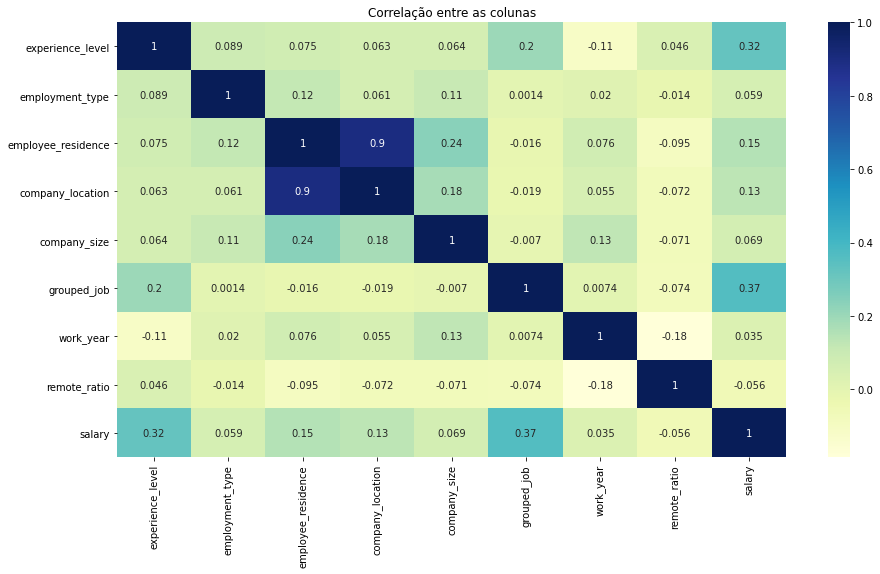

In [72]:
plt.figure(figsize=(15,8))
plt.title("Correlação entre as colunas")
dataplot = sb.heatmap(df_aux.corr(), cmap="YlGnBu", annot=True) 

In [142]:
df.corrwith(np.power(10, y_train))

work_year       0.017226
salary          0.957259
remote_ratio   -0.048549
local           0.098038
dtype: float64

In [74]:
def local(row):
    if row['employee_residence'] == row['company_location']:
        val = 1
    else:
        val = 0
    return val

df['local'] = df.apply(local, axis=1)
df = df.drop(columns=["employee_residence", "company_location"], errors="ignore")

In [75]:
# Função para treinar e avaliar múltiplas arquiteturas de MLP
def evaluate_mlp_structures(X_train, y_train, X_val, y_val, structures):
    best_structure = None
    best_score = float('-inf')
    results = []

    for structure in structures:
        mlp = MLPRegressor(hidden_layer_sizes=structure, random_state=42, max_iter=500, early_stopping=True, learning_rate_init=0.0001)
        mlp.fit(X_train, y_train)
        y_val_pred = mlp.predict(X_val)
        r2 = r2_score(y_val, y_val_pred)
        
        results.append((structure, r2))
        
        if r2 > best_score:
            best_score = r2
            best_structure = structure
            
    return best_structure, results

In [95]:
# Função para gerar um relatório de desempenho
def regression_report(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)

    report = {
        'R2 Score': r2,
        'RMSE': rmse,
        'MAPE': mape
    }
    
    return report

In [136]:
# Dividir os dados em treino, teste e validação
X_train, X_test, X_val, y_train, y_test, y_val = split_data(df, target_column='salary')

# Identificar colunas categóricas e numéricas
categorical_cols = X_train.select_dtypes(include=['string', "object"]).columns
numerical_cols = X_train.select_dtypes(exclude=['string', "object"]).columns

# Criar o pipeline
pipeline = create_pipeline(categorical_cols, numerical_cols)

# Fit nos dados de treino e transform nos dados de treino, teste e validação
X_train = pipeline.fit_transform(X_train, y_train)
X_test = pipeline.transform(X_test)
X_val = pipeline.transform(X_val)

# Estruturas de MLP para testar
structures = [(50, 50), (10, 10, 10)]

# Avaliar múltiplas arquiteturas de MLP
best_structure, results = evaluate_mlp_structures(X_train, y_train, X_val, y_val, structures)

print(f"Melhor estrutura de MLP: {best_structure}")
print("Resultados da avaliação:")
for structure, score in results:
    print(f"Estrutura: {structure}, R2: {score}")

# Treinar a rede neural final com a melhor arquitetura
best_mlp = MLPRegressor(hidden_layer_sizes=best_structure, random_state=42, max_iter=500, early_stopping=True, learning_rate_init=0.0001)
best_mlp.fit(X_train, y_train)

# Prever no conjunto de teste
y_test_pred = best_mlp.predict(X_test)
y_test_pred = np.power(10, y_test_pred)


y_test = np.power(10, y_test)

# Gerar e imprimir relatório de desempenho
report = regression_report(y_test, y_test_pred)
print("\nRelatório de Desempenho:")
for metric, value in report.items():
    print(f"{metric}: {value}")

Melhor estrutura de MLP: (50, 50)
Resultados da avaliação:
Estrutura: (50, 50), R2: 0.28037153056214525
Estrutura: (10, 10, 10), R2: 0.23984725632460524

Relatório de Desempenho:
R2 Score: 0.23399267230094511
RMSE: 53574.59190520157
MAPE: 0.29965310567448794


In [124]:
def plot_residuals(y_true, y_pred, title='Residuals Plot'):
    """
    Plota os resíduos de um modelo de regressão.

    Parâmetros:
    - y_true: Valores reais (array-like)
    - y_pred: Valores preditos (array-like)
    - title: Título do gráfico (string, opcional)
    """
    residuals = y_true - y_pred
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Valores Reais')
    plt.ylabel('Resíduos')
    plt.title(title)
    plt.show()

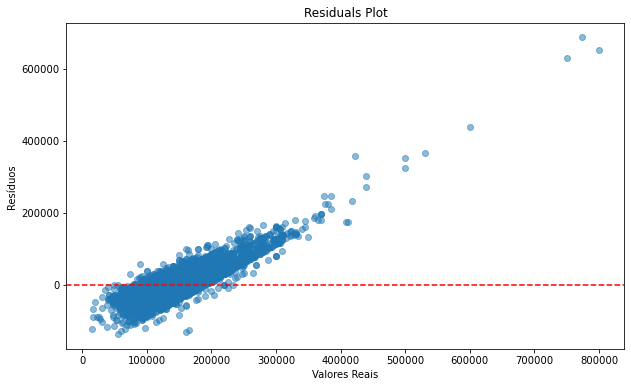

In [126]:
plot_residuals(y_test, y_test_pred)

In [120]:
y_test

5667     125000.0
2259     168000.0
949       90200.0
4178     110400.0
13496    150000.0
           ...   
9424      90000.0
9467     100000.0
4596     133200.0
6093      72000.0
14665    260000.0
Name: salary, Length: 3059, dtype: float64

In [137]:
df_train = pd.DataFrame(X_train, columns=list(categorical_cols)+list(numerical_cols))

In [138]:
df_train.describe([0.01, 0.05, 0.25,0.5,0.75,0.95,0.99])

,experience_level,employment_type,company_size,grouped_job,work_year,remote_ratio,local
count,9138.000000,9138.000000,9138.000000,9138.000000,9138.000000,9138.000000,9138.000000
mean,-0.368717,-0.000379,-0.001918,0.055488,0.252791,0.318067,-0.005253
std,0.670523,0.005906,0.020943,1.571310,0.672646,0.464604,0.072289
min,-2.181890,-0.103413,-0.241968,-2.916148,-3.000000,0.000000,-1.000000
1%,-2.181890,0.000000,-0.001781,-2.916148,-1.000000,0.000000,0.000000
5%,-2.181890,0.000000,-0.001781,-2.916148,-1.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
95%,0.000000,0.000000,0.000000,1.927456,1.000000,1.000000,0.000000


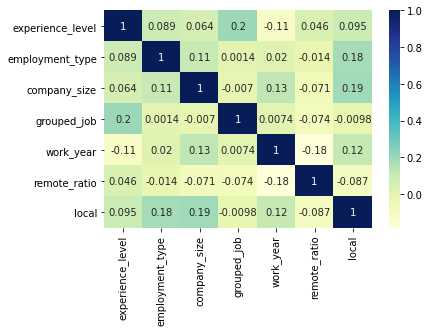

In [78]:
import seaborn as sb 

# plotting correlation heatmap 
df_train = pd.DataFrame(X_train, columns=list(categorical_cols)+list(numerical_cols))

dataplot = sb.heatmap(df_train.corr(), cmap="YlGnBu", annot=True) 

In [ ]:
# Função para treinar e avaliar múltiplas arquiteturas de MLP
def evaluate_mlp_structures(X_train, y_train, X_val, y_val, structures):
    best_structure = None
    best_score = float('-inf')
    results = []

    for structure in structures:
        mlp = MLPRegressor(hidden_layer_sizes=structure, random_state=42, max_iter=500)
        mlp.fit(X_train, y_train)
        y_val_pred = mlp.predict(X_val)
        r2 = r2_score(y_val, y_val_pred)
        
        results.append((structure, r2))
        
        if r2 > best_score:
            best_score = r2
            best_structure = structure
            
    return best_structure, results

### Visualizações

In [7]:
# New dataframe with company sizes ordered for visualization
df_ordered = df
df_ordered['company_size'] = pd.Categorical(df_ordered['company_size'], categories=['L', 'M', 'S'], ordered=True)
df_ordered["company_size"].dtype



CategoricalDtype(categories=['L', 'M', 'S'], ordered=True)

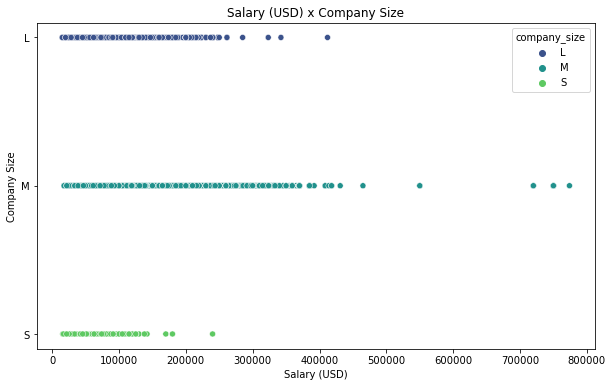

In [12]:
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='salary_in_usd', y='company_size', hue='company_size', palette="viridis")

# Configura os rótulos e o título do gráfico
plt.xlabel('Salary (USD)')
plt.ylabel('Company Size')
plt.title('Salary (USD) x Company Size')

# Exibe o gráfico
plt.show()

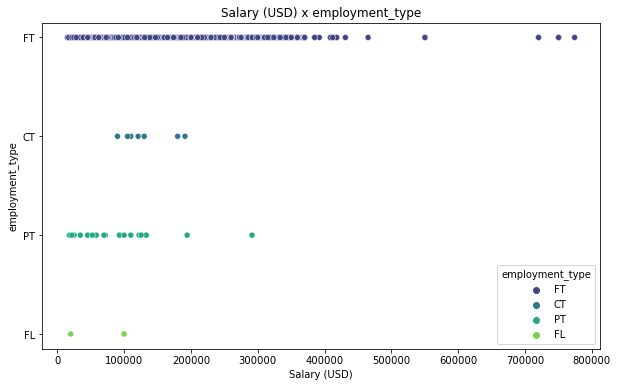

In [24]:
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='salary_in_usd', y='employment_type', hue='employment_type', palette="viridis")

# Configura os rótulos e o título do gráfico
plt.xlabel('Salary (USD)')
plt.ylabel('employment_type')
plt.title('Salary (USD) x employment_type')

# Exibe o gráfico
plt.show()

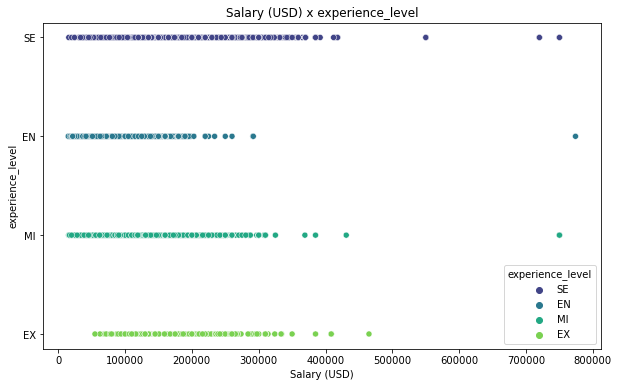

In [25]:
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='salary_in_usd', y='experience_level', hue='experience_level', palette="viridis")

# Configura os rótulos e o título do gráfico
plt.xlabel('Salary (USD)')
plt.ylabel('experience_level')
plt.title('Salary (USD) x experience_level')

# Exibe o gráfico
plt.show()

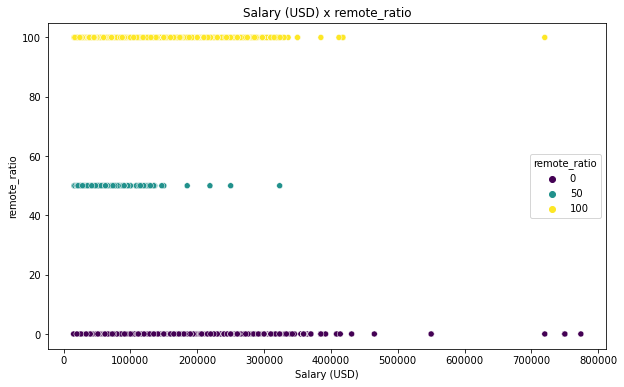

In [28]:
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='salary_in_usd', y='remote_ratio', hue='remote_ratio', palette="viridis")

# Configura os rótulos e o título do gráfico
plt.xlabel('Salary (USD)')
plt.ylabel('remote_ratio')
plt.title('Salary (USD) x remote_ratio')

# Exibe o gráfico
plt.show()

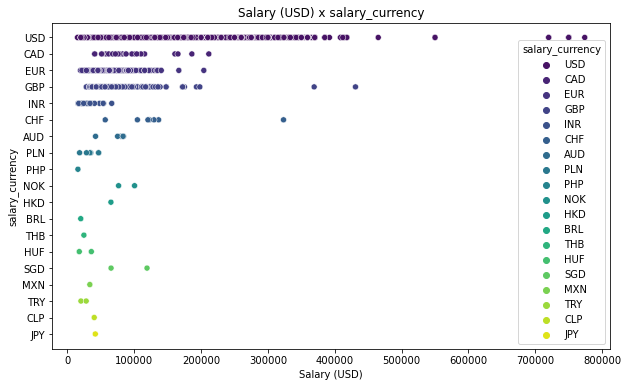

In [32]:
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='salary_in_usd', y='salary_currency', hue='salary_currency', palette="viridis")

# Configura os rótulos e o título do gráfico
plt.xlabel('Salary (USD)')
plt.ylabel('salary_currency')
plt.title('Salary (USD) x salary_currency')

# Exibe o gráfico
plt.show()

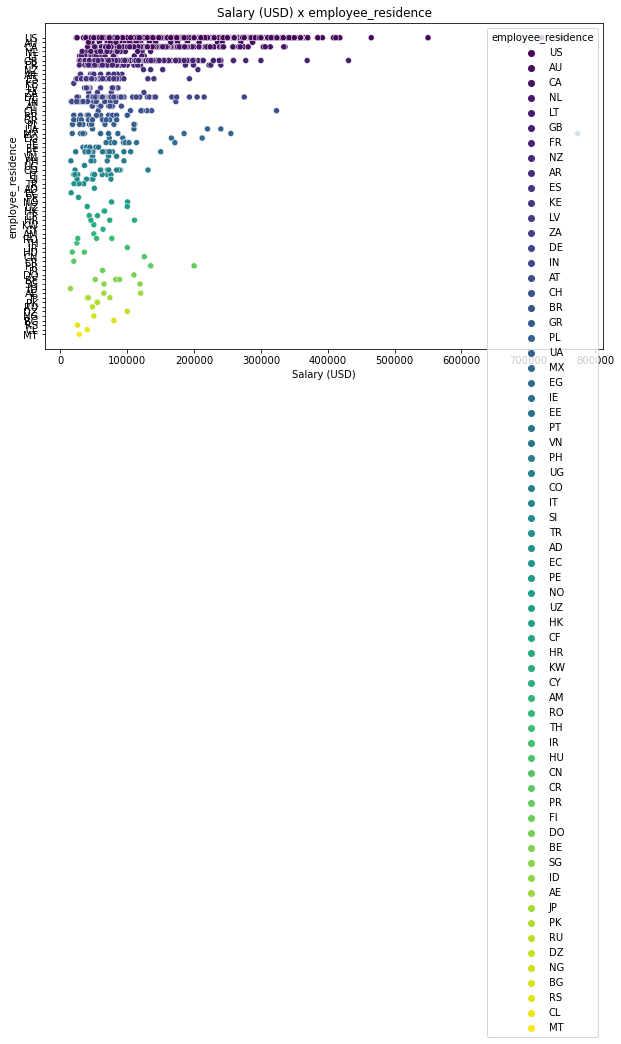

In [33]:
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='salary_in_usd', y='employee_residence', hue='employee_residence', palette="viridis")

# Configura os rótulos e o título do gráfico
plt.xlabel('Salary (USD)')
plt.ylabel('employee_residence')
plt.title('Salary (USD) x employee_residence')

# Exibe o gráfico
plt.show()

<AxesSubplot:>

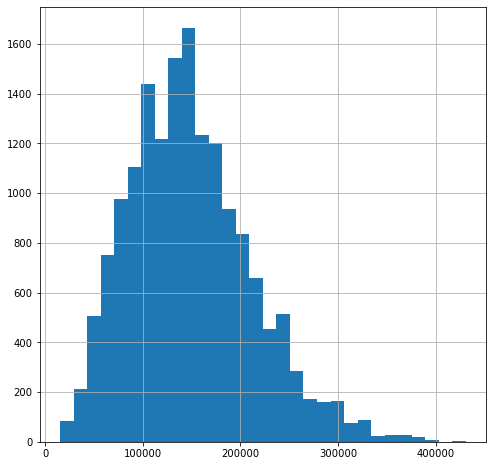

In [77]:
#df["salary_in_usd"].plot.density(color='green')
df["salary_in_usd"].hist(bins=30, figsize=(8,8)) 

<AxesSubplot:>

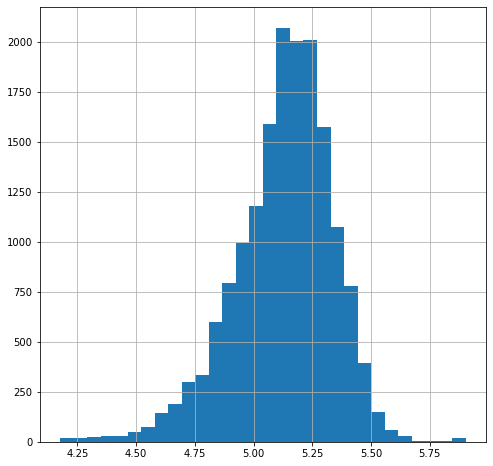

In [26]:
import numpy as np

df["salary_in_usd"].apply(np.log10).hist(bins=30, figsize=(8,8)) 

In [23]:
df.sort_values(by = "salary_in_usd", ascending=False).head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3647,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M
5033,2024,SE,FT,Data Analyst,750000,USD,750000,US,0,US,M
7498,2023,SE,FT,Data Scientist,750000,USD,750000,US,0,US,M
6412,2023,MI,FT,Machine Learning Engineer,750000,USD,750000,US,0,US,M
7390,2023,MI,FT,Data Engineer,750000,USD,750000,US,0,US,M
4310,2024,SE,FT,Data Scientist,720000,USD,720000,US,0,US,M
2302,2024,SE,FT,Data Scientist,720000,USD,720000,US,100,US,M
1886,2024,SE,FT,Machine Learning Engineer,550000,USD,550000,US,0,US,M
1890,2024,SE,FT,Machine Learning Engineer,550000,USD,550000,US,0,US,M
7066,2023,EX,FT,Data Engineer,465000,USD,465000,US,0,US,M
